In [ ]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!pip install yfinance
import yfinance as yf

In [ ]:
data=yf.download(tickers=['SPY','^GSPC','^IXIC','^DJI','^FCHI','^GDAXI', '^AORD','^HSI','^N225'],start='2008-01-04')['Adj Close']

[*********************100%%**********************]  9 of 9 completed


In [ ]:
data = pd.DataFrame(data)
data.head()

,SPY,^AORD,^DJI,^FCHI,^GDAXI,^GSPC,^HSI,^IXIC,^N225
Date,,,,,,,,,
2008-01-04,104.107941,6385.399902,12800.179688,5446.790039,7808.689941,1411.630005,27519.689453,2504.649902,14691.410156
2008-01-07,104.019585,6240.399902,12827.490234,5452.830078,7817.169922,1416.180054,27179.490234,2499.459961,14500.549805
2008-01-08,102.339813,6205.700195,12589.070312,5495.669922,7849.990234,1390.189941,27112.900391,2440.510010,14528.669922
2008-01-09,103.415413,6159.500000,12735.309570,5435.419922,7782.709961,1409.130005,27615.849609,2474.550049,14599.160156
2008-01-10,104.093224,6147.299805,12853.089844,5400.430176,7713.089844,1420.329956,27230.859375,2488.520020,14388.110352


In [ ]:
data.columns=['spy','aord','dji','cac40','daxi','sp500','hsi','nasdaq','nikkei']
data.head()

,spy,aord,dji,cac40,daxi,sp500,hsi,nasdaq,nikkei
Date,,,,,,,,,
2008-01-04,104.107941,6385.399902,12800.179688,5446.790039,7808.689941,1411.630005,27519.689453,2504.649902,14691.410156
2008-01-07,104.019585,6240.399902,12827.490234,5452.830078,7817.169922,1416.180054,27179.490234,2499.459961,14500.549805
2008-01-08,102.339813,6205.700195,12589.070312,5495.669922,7849.990234,1390.189941,27112.900391,2440.510010,14528.669922
2008-01-09,103.415413,6159.500000,12735.309570,5435.419922,7782.709961,1409.130005,27615.849609,2474.550049,14599.160156
2008-01-10,104.093224,6147.299805,12853.089844,5400.430176,7713.089844,1420.329956,27230.859375,2488.520020,14388.110352


In [ ]:
data['spy_lag1']=data['spy'].shift(-1)

In [ ]:
data.head()

,spy,aord,dji,cac40,daxi,sp500,hsi,nasdaq,nikkei,spy_lag1
Date,,,,,,,,,,
2008-01-04,104.107941,6385.399902,12800.179688,5446.790039,7808.689941,1411.630005,27519.689453,2504.649902,14691.410156,104.019585
2008-01-07,104.019585,6240.399902,12827.490234,5452.830078,7817.169922,1416.180054,27179.490234,2499.459961,14500.549805,102.339813
2008-01-08,102.339813,6205.700195,12589.070312,5495.669922,7849.990234,1390.189941,27112.900391,2440.510010,14528.669922,103.415413
2008-01-09,103.415413,6159.500000,12735.309570,5435.419922,7782.709961,1409.130005,27615.849609,2474.550049,14599.160156,104.093224
2008-01-10,104.093224,6147.299805,12853.089844,5400.430176,7713.089844,1420.329956,27230.859375,2488.520020,14388.110352,103.253334


In [ ]:
data.index=data.index.to_period('d')

In [ ]:
# Split data into Train and Test sets
Train = data.iloc[-2000:-1000, :].copy()  # Ensure Train is a copy
Test = data.iloc[-1000:, :].copy()  # Ensure Test is a copy

In [ ]:
# Model building
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm = smf.ols(formula=formula, data=Train).fit()

In [ ]:
# Making predictions and adding them to the DataFrames
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

# Profit of Signal-based strategy

In [ ]:
# Train
Train['Order'] = [1 if sig>0 else -1 for sig in Train['PredictedY']]
Train['Profit'] = Train['spy'] * Train['Order']

Train['Wealth'] = Train['Profit'].cumsum()
print('Total profit made in Train: ', Train['Profit'].sum())

Total profit made in Train:  158366.64022827148


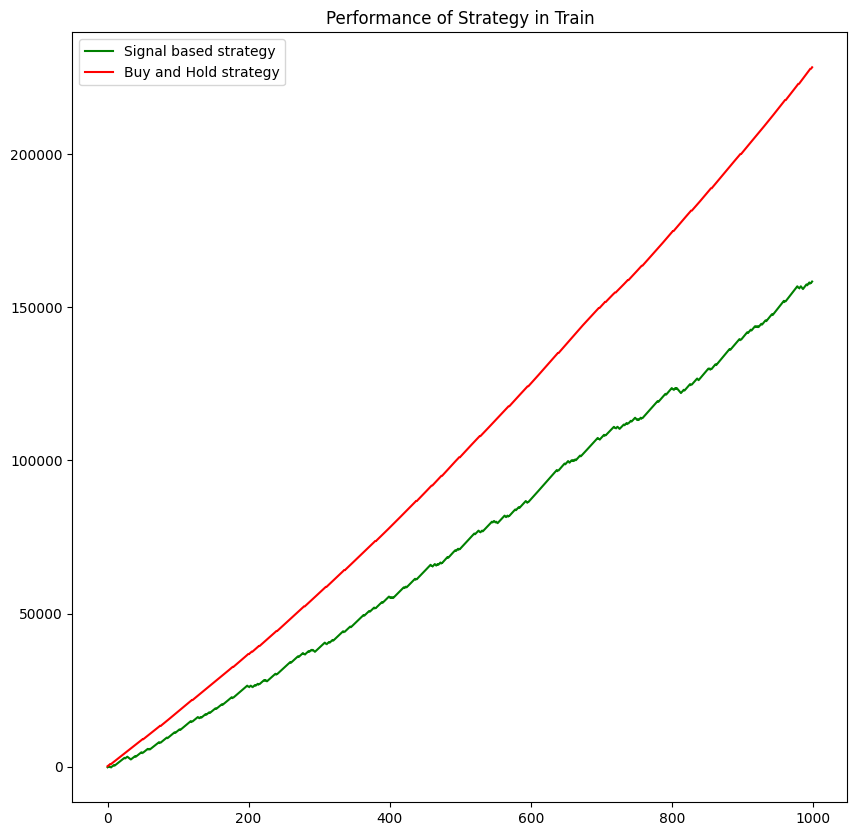

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Train['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Train['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [ ]:
# Test
Test['Order'] = [1 if sig>0 else -1 for sig in Test['PredictedY']]
Test['Profit'] = Test['spy'] * Test['Order']

Test['Wealth'] = Test['Profit'].cumsum()
print('Total profit made in Test: ', Test['Profit'].sum())

Total profit made in Test:  260359.27209472656


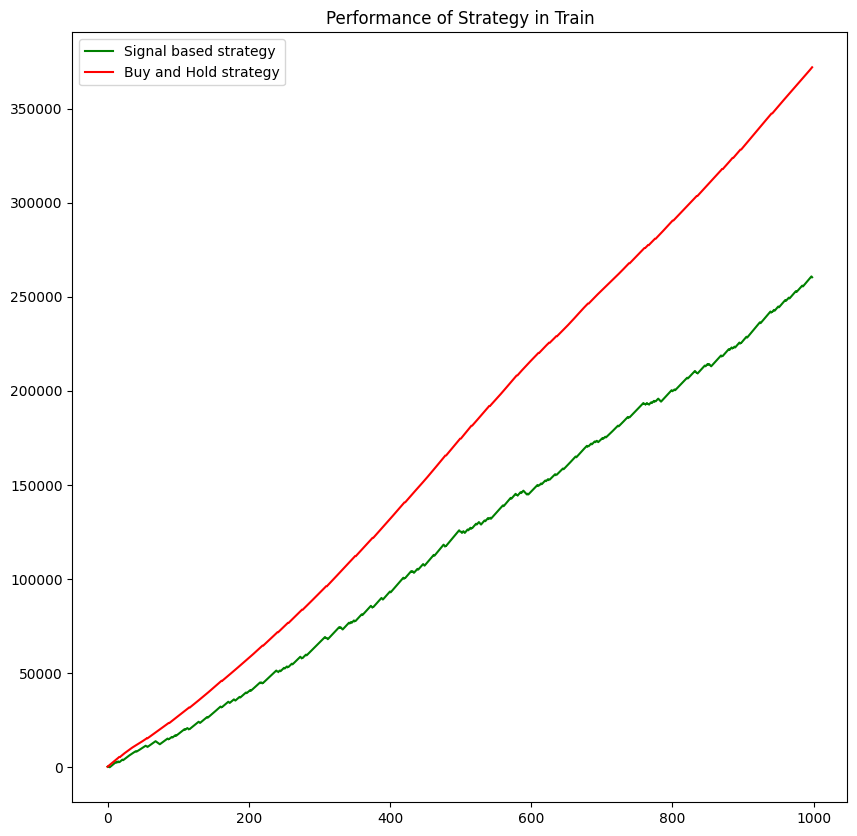

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Test['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Test['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

# Evaluation of model - Practical Standard

We introduce two common practical standards - **Sharpe Ratio**, **Maximum Drawdown** to evaluate our model performance


In [ ]:
Train['Wealth'] = Train['Wealth'] + Train.loc[Train.index[0], 'Price']
Test['Wealth'] = Test['Wealth'] + Test.loc[Test.index[0], 'Price']

KeyError: ignored

In [ ]:
# Sharpe Ratio on Train data
Train['Return'] = np.log(Train['Wealth']) - np.log(Train['Wealth'].shift(1))
dailyr = Train['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

In [ ]:
# Sharpe Ratio in Test data
Test['Return'] = np.log(Test['Wealth']) - np.log(Test['Wealth'].shift(1))
dailyr = Test['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

In [ ]:
# Maximum Drawdown in Train data
Train['Peak'] = Train['Wealth'].cummax()
Train['Drawdown'] = (Train['Peak'] - Train['Wealth'])/Train['Peak']
print('Maximum Drawdown in Train is ', Train['Drawdown'].max())

In [ ]:
# Maximum Drawdown in Test data
Test['Peak'] = Test['Wealth'].cummax()
Test['Drawdown'] = (Test['Peak'] - Test['Wealth'])/Test['Peak']
print('Maximum Drawdown in Test is ', Test['Drawdown'].max())